### Libraries

In [25]:
import torch
import plotly.express as px
import plotly.graph_objects as po
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
torch.cuda.is_available()

True

### Create Subject 1, Series 1, data Pandas data frame 

In [26]:
subj1_series1_data_pd=pd.read_csv("grasp-and-lift-eeg-detection//train//train//subj1_series1_data.csv")
subj1_series1_data_pd.drop('id',axis=1,inplace=True)
subj1_series1_data_pd.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,-31,363,211,121,211,15,717,279,35,158,...,536,348,383,105,607,289,459,173,120,704
1,-29,342,216,123,222,200,595,329,43,166,...,529,327,369,78,613,248,409,141,83,737
2,-172,278,105,93,222,511,471,280,12,177,...,511,319,355,66,606,320,440,141,62,677
3,-272,263,-52,99,208,511,428,261,27,180,...,521,336,356,71,568,339,437,139,58,592
4,-265,213,-67,99,155,380,476,353,32,165,...,550,324,346,76,547,343,446,171,67,581


### Create Subject 1, Series 1, data columns

In [27]:
electrodes_to_plot = subj1_series1_data_pd.columns
electrodes_to_plot

Index(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10',
       'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'],
      dtype='object')

### Divide entry number by 500 because sampling rate is 500 Hz

In [28]:
time = subj1_series1_data_pd.index / 500.0  # time in seconds
time

Index([    0.0,   0.002,   0.004,   0.006,   0.008,    0.01,   0.012,   0.014,
         0.016,   0.018,
       ...
       238.972, 238.974, 238.976, 238.978,  238.98, 238.982, 238.984, 238.986,
       238.988,  238.99],
      dtype='float64', length=119496)

### Plot all EEG signals

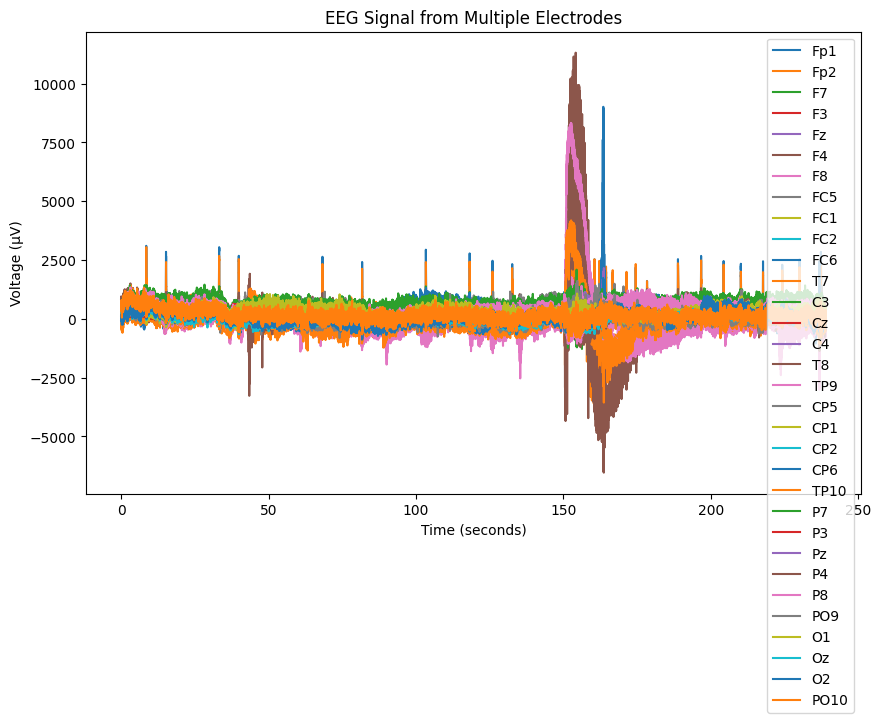

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for electrode in electrodes_to_plot:
    plt.plot(time, subj1_series1_data_pd[electrode], label=electrode)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (µV)')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()

### Create Subject 1, Series 1, events Pandas data frame 

In [30]:
subj1_series1_events_pd=pd.read_csv("grasp-and-lift-eeg-detection//train//train//subj1_series1_events.csv")

subj1_series1_events_pd.head()

,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,subj1_series1_0,0,0,0,0,0,0
1,subj1_series1_1,0,0,0,0,0,0
2,subj1_series1_2,0,0,0,0,0,0
3,subj1_series1_3,0,0,0,0,0,0
4,subj1_series1_4,0,0,0,0,0,0


### Plot all events

Index(['HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff',
       'Replace', 'BothReleased'],
      dtype='object')


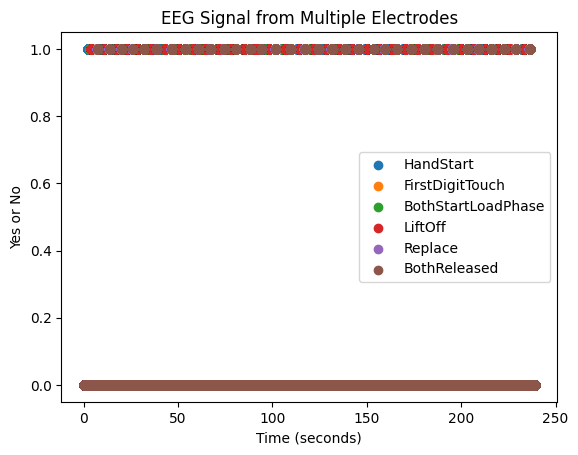

In [31]:
events_to_plot=subj1_series1_events_pd.columns[1:]
print(events_to_plot)
#plt.figure(figsize=(10, 6))
for event in events_to_plot:
    plt.scatter(time, subj1_series1_events_pd[event], label=event)
plt.xlabel('Time (seconds)')
plt.ylabel('Yes or No')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()

### Plot rows 1000 to 1400 

In [32]:
row_start=900
row_end=1400
time_slice=time[row_start:row_end]

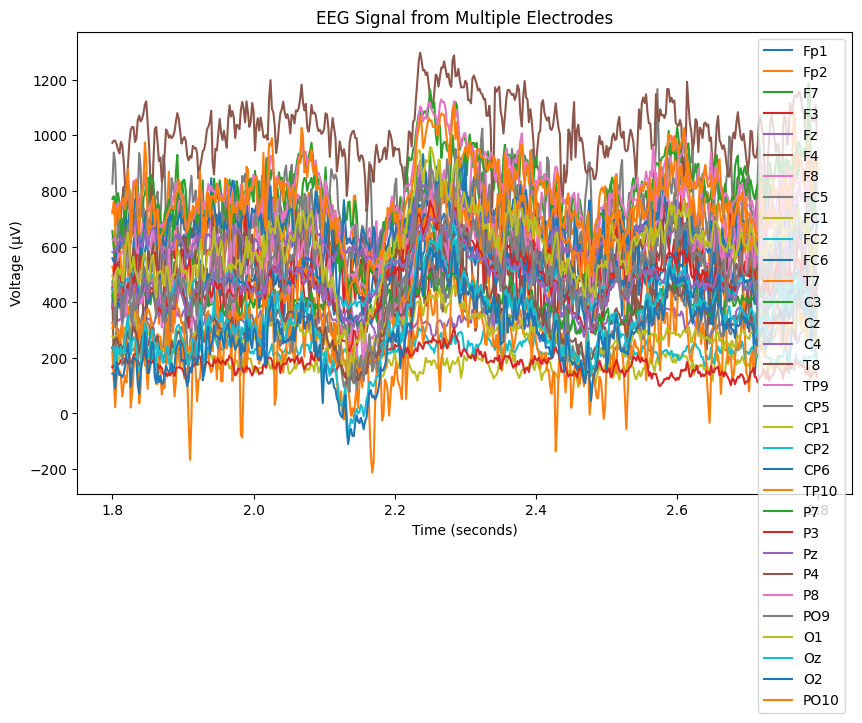

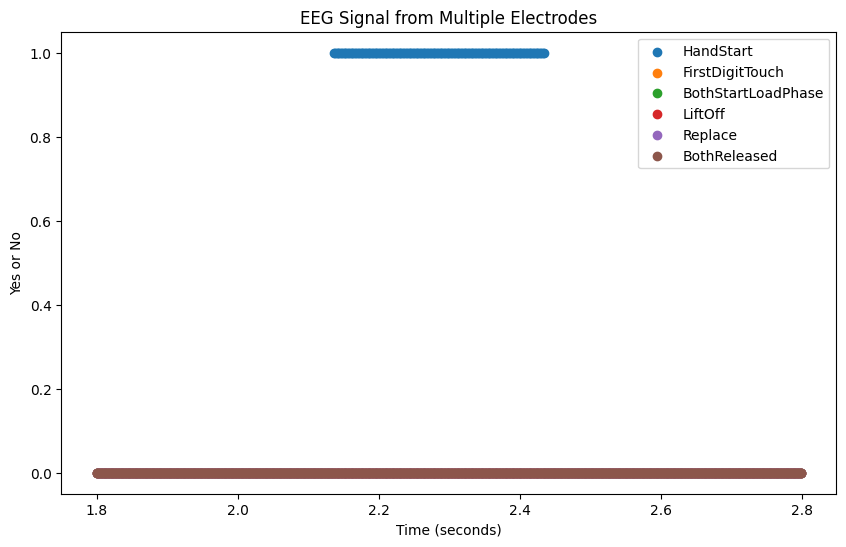

In [33]:
subj1_series1_data_pd_first_hundred=subj1_series1_data_pd.iloc[row_start:row_end]
subj1_series1_events_pd_first_hundred=subj1_series1_events_pd.iloc[row_start:row_end]
plt.figure(figsize=(10, 6))
for electrode in electrodes_to_plot:
    plt.plot(time_slice, subj1_series1_data_pd_first_hundred[electrode], label=electrode)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (µV)')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
for event in events_to_plot:
    plt.scatter(time_slice, subj1_series1_events_pd_first_hundred[event], label=event)
plt.xlabel('Time (seconds)')
plt.ylabel('Yes or No')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()

### Band Pass Filter for frequency of 0.1 to 30 Hz
Trying Butterworth Bandpass. There are more options available
https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html 

In [34]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y
lowcut = 0.1
highcut = 30 # Excluding Gamma. Else 100
fs = 500 #Sampling rate (in Hz)
filtered_data = butter_bandpass_filter(subj1_series1_data_pd[electrodes_to_plot].values, lowcut, highcut, fs, order=9)
#filtered_data[abs(filtered_data) <= 10] = np.NaN  # Set extreme values to 0, or handle as needed
filtered_df = pd.DataFrame(filtered_data,columns=electrodes_to_plot)
#filtered_df.insert(0,"id",subj1_series1_data_pd["id"])
filtered_df.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,-0.000003,-0.000014,0.000233,0.003118,0.019912,0.087197,0.295342,0.824699,1.978096,4.196324,...,249.099055,263.269059,272.694833,277.987446,280.169612,280.499168,280.277784,280.670779,282.559037,286.439263
1,-0.000003,-0.000013,0.000224,0.002983,0.019064,0.083686,0.284459,0.798126,1.926184,4.116914,...,262.734652,276.772499,285.250086,288.837296,288.698211,286.290342,283.141369,280.635494,279.836037,281.364510
2,-0.000019,-0.000267,-0.001820,-0.007925,-0.024564,-0.056373,-0.092665,-0.079630,0.121462,0.785199,...,252.982820,272.497727,285.559642,292.228693,293.242951,289.872674,283.717425,276.478449,269.738423,264.777452
3,-0.000030,-0.000441,-0.003206,-0.015288,-0.054044,-0.151633,-0.352034,-0.692745,-1.164774,-1.650316,...,220.314260,243.767696,261.577018,273.416485,279.632132,281.133241,279.220417,275.380880,271.081446,267.586982
4,-0.000029,-0.000434,-0.003200,-0.015503,-0.055852,-0.160307,-0.382761,-0.781279,-1.383392,-2.127950,...,208.003296,234.955071,257.305275,274.504493,286.601859,294.158310,298.099556,299.537775,299.591166,299.228272


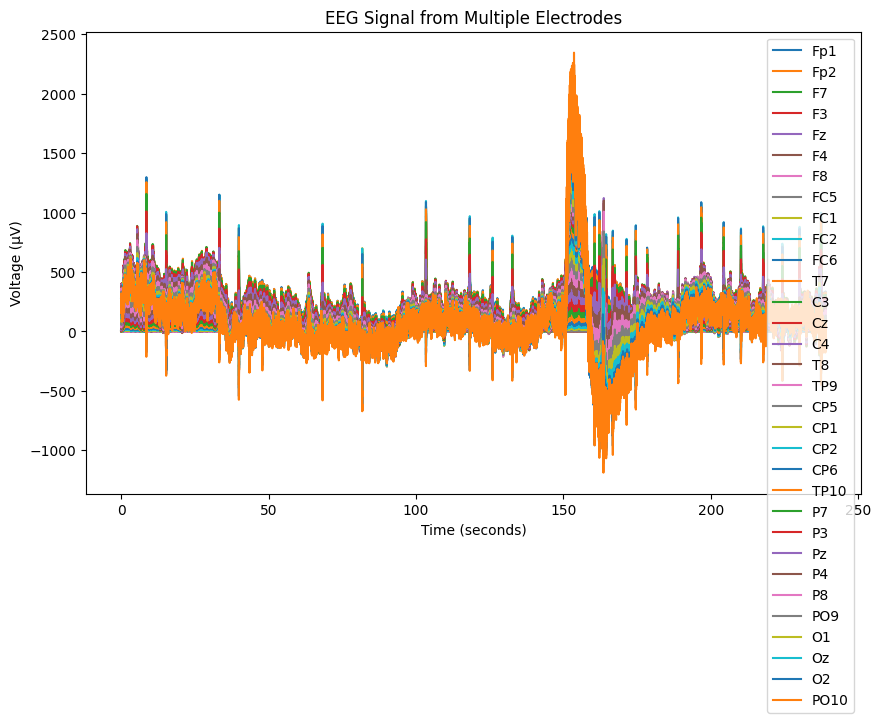

In [35]:
plt.figure(figsize=(10, 6))
for electrode in electrodes_to_plot:
    plt.plot(time, filtered_df[electrode], label=electrode)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (µV)')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()

### Normalization

In [36]:
scaler = MinMaxScaler(feature_range=(-2.5,2.5))
subj1_series1_data_pd[electrodes_to_plot]=scaler.fit_transform(filtered_df[electrodes_to_plot])
subj1_series1_data_pd.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,-1.271676,-1.272411,-1.275247,-1.280528,-1.288480,-1.299232,-1.312817,-1.329155,-1.348023,-1.369055,...,-0.976447,-0.652271,-0.358813,-0.139438,-0.084719,-0.143482,-0.254236,-0.397991,-0.396634,-0.412355
1,-1.269268,-1.271641,-1.275960,-1.282547,-1.291615,-1.303258,-1.317448,-1.334013,-1.352629,-1.372849,...,-0.935623,-0.613924,-0.325839,-0.113055,-0.066063,-0.132141,-0.249125,-0.398050,-0.400742,-0.419534
2,-1.441474,-1.439682,-1.440790,-1.445126,-1.452843,-1.463878,-1.477930,-1.494466,-1.512762,-1.532005,...,-0.964819,-0.626063,-0.325026,-0.104808,-0.056122,-0.125126,-0.248097,-0.404972,-0.415974,-0.443000
3,-1.561898,-1.555045,-1.552612,-1.554858,-1.561787,-1.573120,-1.588303,-1.606543,-1.626890,-1.648350,...,-1.062625,-0.707651,-0.388011,-0.150553,-0.085894,-0.142240,-0.256123,-0.406799,-0.413948,-0.439025
4,-1.553468,-1.550654,-1.552120,-1.558068,-1.568470,-1.583068,-1.601379,-1.622727,-1.646288,-1.671167,...,-1.099483,-0.732677,-0.399230,-0.147907,-0.070649,-0.116733,-0.222428,-0.366576,-0.370942,-0.394263


### Plot all data again

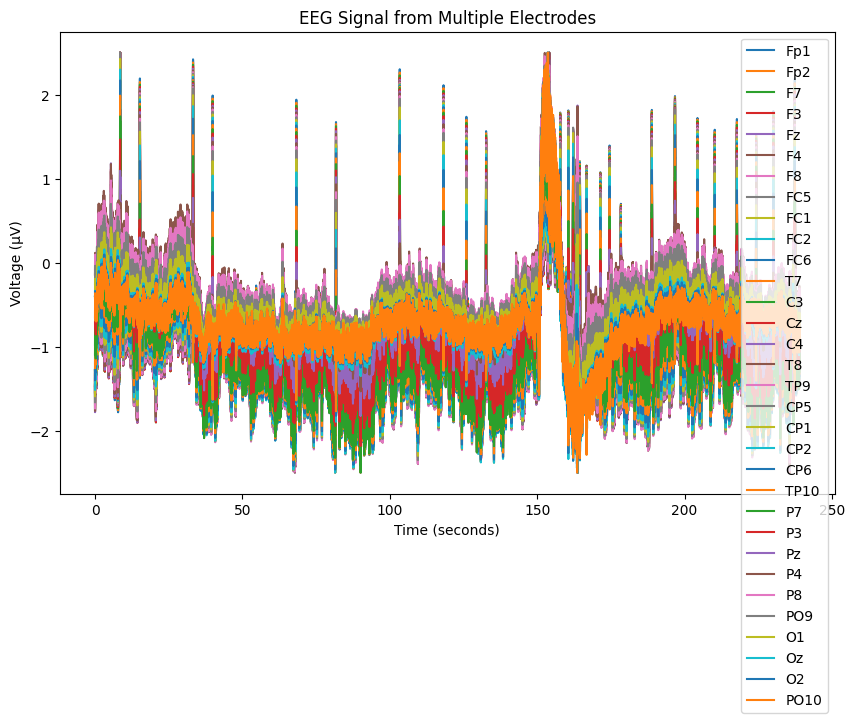

In [37]:
plt.figure(figsize=(10, 6))
for electrode in electrodes_to_plot:
    plt.plot(time, subj1_series1_data_pd[electrode], label=electrode)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (µV)')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()

### PCA
I am not applying standardization because:
1. I don't believe the data is of different units
2. They are of the same scale (I think)

The measurements are from different sensors though
https://stackoverflow.com/questions/70785712/confused-about-standardization-before-pca

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
subj1_series1_data_pd.fillna(0,inplace=True)
pca_data = pca.fit_transform(subj1_series1_data_pd)
pca_df = pd.DataFrame(data=pca_data)
#pca_df.fillna(0,inplace=True)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.764507,1.294356,-0.103873,-0.040737,-0.017650,-0.044075,0.006557,-0.002148,0.000151,-0.000536,1.037043e-04,0.000078,0.000020,-5.373589e-07,-0.000024,-0.000005
1,-0.695441,1.327989,-0.174842,-0.027767,-0.000119,-0.040285,0.003094,-0.002467,0.000245,-0.000382,5.340832e-05,0.000075,0.000023,4.923882e-06,-0.000018,-0.000005
2,-1.256834,1.633373,-0.360472,-0.024078,0.023493,-0.046743,-0.005048,-0.004895,0.000418,-0.000037,-7.824390e-07,0.000029,0.000017,1.754103e-05,-0.000012,-0.000004
3,-1.804753,1.800548,-0.351021,-0.031405,0.028879,-0.060648,-0.007042,-0.007189,-0.000222,-0.000173,-1.724802e-05,0.000015,0.000009,2.069841e-05,-0.000011,-0.000005
4,-1.915436,1.890461,-0.240065,0.005121,0.030807,-0.064057,-0.001741,-0.005952,-0.000645,-0.000328,7.510142e-05,0.000044,0.000008,2.076471e-05,-0.000012,-0.000005


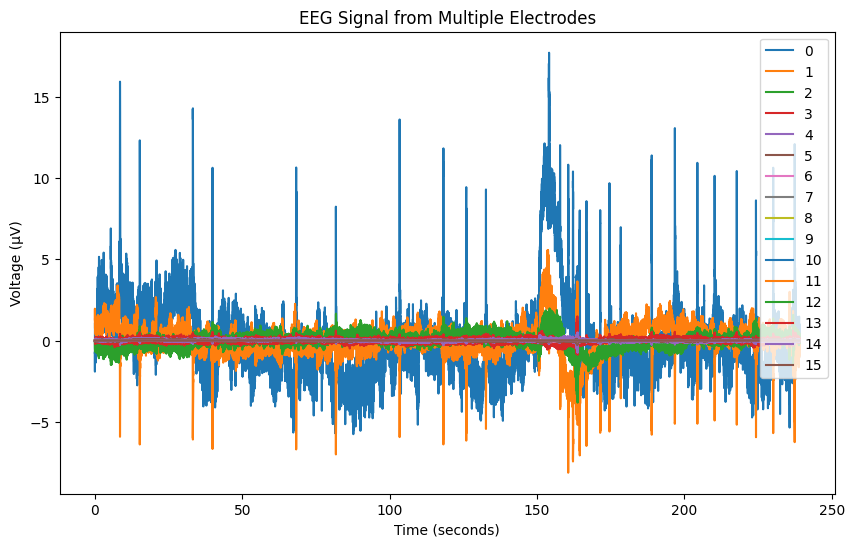

In [47]:
plt.figure(figsize=(10, 6))
for column in pca_df.columns:
    plt.plot(time, pca_df[column], label=column)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (µV)')
plt.title('EEG Signal from Multiple Electrodes')
plt.legend()
plt.show()

### Neural Network

In [40]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [41]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 6),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [48]:
model = NeuralNetwork().to(device)
print(model)
print(sum([torch.prod(torch.tensor(i.shape)) for i in model.parameters()]))

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=6, bias=True)
  )
)
tensor(274438)


### Train and test functions from M7

In [43]:
def train(model, train_dataloader, optimizer, print_freq=10):
    model.train()

    train_loss = 0
    
    for batch_index, (data, target) in enumerate(train_dataloader):
        # Move data and target to the same device as the model
        data, target = data.cuda(), target.cuda()  
        
        optimizer.zero_grad()
        output = model(data)

        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()

        optimizer.step()
        
        train_loss += loss.item() * data.shape[0]
        
        if not (batch_index % print_freq):
            print("Current Loss:", loss)

    return train_loss / len(train_dataloader.dataset)

def test(model, test_dataloader):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_index, (data, target) in enumerate(test_dataloader):
            # Move data and target to the same device as the model
            data, target = data.cuda(), target.cuda()
            
            output = model(data)
            
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()

            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_dataloader.dataset)
    test_accuracy = correct / len(test_dataloader.dataset)
    
    return test_loss, test_accuracy

### Training Loop

In [44]:
def train_model(model, train_dataloader, test_dataloader, optimizer, num_epochs):
    loss_results=[]
    accuracy_results=[]
    for i in range(num_epochs):
        train_loss = train(model, train_dataloader, optimizer)
        test_loss, test_accuracy = test(model, test_dataloader)
        
        print(
            f'Epoch: {i + 1} | Train loss: {train_loss:.5f} |',
            f'Test loss: {test_loss:.5f} | Test accuracy: {test_accuracy:.5f}'
        )
        accuracy_results.append([i+1,test_accuracy])
        loss_results.append([i+1,test_loss])
    return accuracy_results,loss_results

### Create the train data and events tensor

In [45]:
import torch.utils.data as data_utils
data_tensor = torch.tensor(pca_df.values, dtype=torch.float32)
events_tensor = torch.tensor(subj1_series1_events_pd.values,dtype=int)

train_dataset=data_utils.TensorDataset(data_tensor,events_tensor)
train_dataset_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=False)

In [2]:
import scipy.io
import pandas as pd
mat = scipy.io.loadmat('801_Session_1_PDDys_VV_withcueinfo.mat')
print(mat.keys())
print(mat['EEG'].shape)
print(mat['EEG'])

dict_keys(['__header__', '__version__', '__globals__', 'EEG', 'bad_chans', 'bad_epochs', 'bad_ICAs'])
(1, 1)
[[(array(['Epochs'], dtype='<U6'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], shape=(0, 0), dtype=uint8), array(['Original file: 801_1_VV.eeg'], dtype='<U27'), array([[60]], dtype=uint8), array([[194]], dtype=uint8), array([[4000]], dtype=uint16), array([[500]], dtype=uint16), array([[-6]], dtype=int16), array([[1.998]]), array([[-6000, -5998, -5996, ...,  1994,  1996,  1998]], dtype=int16), array([[[ 27.050867  , -15.560649  ,  29.839914  , ...,  -4.058494  ,
           -29.658918  , -25.802124  ],
          [ 13.998632  , -14.795138  ,   8.537915  , ...,  14.190498  ,
           -17.776535  , -46.882626  ],
          [  3.477993  ,  -4.654793  ,   6.321671  , ...,  15.996412  ,
           -20.810484  , -63.694206  ],
          ...,
          [  7.302277  , -18.635197  ,   3.9750013 , ..., -2

In [3]:
# Accessing the actual EEG data
eeg_data = mat['EEG'][0, 0][-1]  # This should point to the EEG signals
print(eeg_data.shape)  # Check the shape of the EEG data
print(mat['EEG'][0, 0].dtype.names)


(4000, 203)
('setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc', 'VEOG', 'X', 'Y', 'Z', 'MASTOIDS')


In [5]:
df=pd.DataFrame(mat['EEG'][0, 0][-1])
print(df.head())

           0            1            2            3            4    \
0 -6947.683594 -6976.040527 -6996.533691 -7047.826172 -7058.570312   
1 -6954.153320 -6973.666016 -7001.144043 -7049.760254 -7072.139648   
2 -6963.096680 -6966.249023 -7006.882812 -7040.002930 -7072.346680   
3 -6961.131836 -6971.427734 -7018.832031 -7030.665527 -7053.320312   
4 -6940.218262 -6975.047363 -7021.945312 -7030.514160 -7051.301270   

           5            6            7            8            9    ...  \
0 -7090.753906 -7068.906738 -7117.313477 -7091.933105 -7118.473633  ...   
1 -7062.166016 -7048.442871 -7120.865234 -7098.988281 -7121.366211  ...   
2 -7054.234375 -7081.786621 -7127.683594 -7099.545410 -7113.485352  ...   
3 -7050.468750 -7074.488281 -7133.898438 -7102.945312 -7108.225586  ...   
4 -7062.390137 -7085.337891 -7093.332031 -7093.763184 -7107.396484  ...   

           193          194          195          196          197  \
0 -7982.143555 -7925.232422 -7932.499512 -7893.055176 -789